In [1]:
import pandas as pd

# animals_data.csv
with open('animals_data.csv', 'r', encoding='euc-kr', errors='replace') as f:
    animals_data = pd.read_csv(f, low_memory=False)

animals_data.to_csv('animals_data_utf8.csv', encoding='utf-8-sig', index=False)

# shelters_data.csv
with open('shelters_data.csv', 'r', encoding='euc-kr', errors='replace') as f:
    shelters_data = pd.read_csv(f, low_memory=False)

shelters_data.to_csv('shelters_data_utf8.csv', encoding='utf-8-sig', index=False)

In [29]:
animals_data.columns
shelters_data.columns

Index(['shelter_name', 'region', 'count', 'long_term', 'adopted', 'species',
       'image_url', 'care_reg_no', 'careAddr', 'lat', 'lon'],
      dtype='object')

In [2]:
animals_data = pd.read_csv('animals_data_utf8.csv', encoding='utf-8-sig')
shelters_data = pd.read_csv('shelters_data_utf8.csv', encoding='utf-8-sig')

print(animals_data.head(5))
print(shelters_data.head(5))

C:\Users\82103\AppData\Local\Temp\ipykernel_3780\2271769900.py:1: DtypeWarning: Columns (11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  animals_data = pd.read_csv('animals_data_utf8.csv', encoding='utf-8-sig')


   desertion_no shelter_name animal_name  species       age  \
0  4.485670e+14     창원동물보호센터  000114 (M)      114  2020(년생)   
1  4.485670e+14     창원동물보호센터  000114 (F)      114  2024(년생)   
2  4.485670e+14     창원동물보호센터  000114 (F)      114  2019(년생)   
3  4.485410e+14   창녕 유기동물보호소  000114 (M)      114  2020(년생)   
4  4.485410e+14   창녕 유기동물보호소  000114 (M)      114  2020(년생)   

                                           image_url personality  \
0  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   
1  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   
2  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   
3  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   
4  http://openapi.animal.go.kr/openapi/service/re...       정보 없음   

                             story notice_date sex process_state Unnamed: 11  \
0  검정색목줄착용.얼굴이 하운드계열 처럼 생겼음.잘 생 김.  2025-07-31   M           보호중         NaN   
1               내장칩 있어요~보호자분과 연락중~  2025-07-31   F  

In [3]:
# notice_date 날짜형 변환
animals_data['notice_date'] = pd.to_datetime(animals_data['notice_date'])

# 보호소 이름 기준으로 region 추가
df = animals_data.merge(
    shelters_data[['shelter_name', 'region']],
    on='shelter_name', how='left'
)

print(df[['notice_date','shelter_name','region']].head())

  notice_date shelter_name region
0  2025-07-31     창원동물보호센터   경상남도
1  2025-07-31     창원동물보호센터   경상남도
2  2025-07-31     창원동물보호센터   경상남도
3  2025-07-31     창원동물보호센터   경상남도
4  2025-07-31     창원동물보호센터   경상남도


In [4]:
daily_region = (
    df.groupby(['notice_date', 'region'])
      .size()
      .reset_index(name='count')
)

print(daily_region.head(10))

  notice_date region  count
0  2020-02-16   경상북도     43
1  2020-03-29   경상북도     43
2  2020-06-18   경상북도     43
3  2021-01-24   경상북도     43
4  2021-02-15   경상북도     43
5  2021-03-19   경상북도     43
6  2021-03-27   경상북도     43
7  2021-04-15   경상북도     43
8  2021-04-30   경상남도     43
9  2021-06-15   경상북도     43


In [32]:
daily_region.columns

Index(['notice_date', 'region', 'count'], dtype='object')

In [5]:
pivot_df = daily_region.pivot(
    index='notice_date',
    columns='region',
    values='count'
).fillna(0)

print(pivot_df.head())

region       강원도  강원특별자치도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
notice_date                                                                     
2020-02-16   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2020-03-29   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2020-06-18   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-01-24   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-02-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   

region       세종특별자치시  울산광역시  인천광역시  전라남도  전라북도  전북특별자치도  제주특별자치도  충청남도  충청북도  
notice_date                                                                   
2020-02-16       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2020-03-29       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2020-06-18       0.0    0.0    0.0   0.0   0.0      0.0      0.0   0.0   0.0  
2021-01-24       0.0    0.0    0.0   

In [31]:
pivot_df.columns

Index(['강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '전북특별자치도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='region')

In [6]:
pivot_features = pivot_df.copy()

# lag 1, lag 7
lag1 = pivot_df.shift(1).add_suffix('_lag1')
lag7 = pivot_df.shift(7).add_suffix('_lag7')

pivot_features = pd.concat([pivot_features, lag1, lag7], axis=1)

# rolling 평균 7일
rolling7 = pivot_df.rolling(7).mean().add_suffix('_rolling7')
pivot_features = pd.concat([pivot_features, rolling7], axis=1)

# 요일/주말 feature
pivot_features['weekday'] = pivot_features.index.weekday
pivot_features['is_weekend'] = pivot_features['weekday'].isin([5,6]).astype(int)

# NaN 제거
pivot_features = pivot_features.dropna()
print(pivot_features.head())

region       강원도  강원특별자치도  경기도  경상남도  경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
notice_date                                                                     
2021-04-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-04-30   0.0      0.0  0.0  43.0   0.0    0.0    0.0    0.0    0.0    0.0   
2021-06-15   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-08-19   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   
2021-09-23   0.0      0.0  0.0   0.0  43.0    0.0    0.0    0.0    0.0    0.0   

region       ...  울산광역시_rolling7  인천광역시_rolling7  전라남도_rolling7  \
notice_date  ...                                                  
2021-04-15   ...             0.0             0.0            0.0   
2021-04-30   ...             0.0             0.0            0.0   
2021-06-15   ...             0.0             0.0            0.0   
2021-08-19   ...             0.0             0.0            0.0   
2021-09-23   ...             0

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Feature: pivot_features (lag, rolling 포함)
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(pivot_features)

# Target: pivot_df (지역별 유기동물 수)
target = pivot_df.loc[pivot_features.index]  # feature index와 동일하게 맞춤
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target)

print("Feature shape:", scaled_features.shape)
print("Target shape:", scaled_target.shape)  # (samples, 지역 수)

Feature shape: (1318, 78)
Target shape: (1318, 19)


In [23]:
time_steps = 30
X, y = [], []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i+time_steps])      # 30일 feature
    y.append(scaled_target[i+time_steps])          # 다음 날 지역별 target 전체

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # (samples, time_steps, feature_dim)
print("y shape:", y.shape)  # (samples, 지역 수)

X shape: (1288, 30, 78)
y shape: (1288, 19)


In [22]:
split = int(len(X) * 0.9)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1159, 30, 78) (129, 30, 78) (1159, 19) (129, 19)


In [30]:
pivot_features.columns

Index(['강원도', '강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '전북특별자치도', '제주특별자치도', '충청남도', '충청북도', '강원도_lag1', '강원특별자치도_lag1',
       '경기도_lag1', '경상남도_lag1', '경상북도_lag1', '광주광역시_lag1', '대구광역시_lag1',
       '대전광역시_lag1', '부산광역시_lag1', '서울특별시_lag1', '세종특별자치시_lag1', '울산광역시_lag1',
       '인천광역시_lag1', '전라남도_lag1', '전라북도_lag1', '전북특별자치도_lag1', '제주특별자치도_lag1',
       '충청남도_lag1', '충청북도_lag1', '강원도_lag7', '강원특별자치도_lag7', '경기도_lag7',
       '경상남도_lag7', '경상북도_lag7', '광주광역시_lag7', '대구광역시_lag7', '대전광역시_lag7',
       '부산광역시_lag7', '서울특별시_lag7', '세종특별자치시_lag7', '울산광역시_lag7', '인천광역시_lag7',
       '전라남도_lag7', '전라북도_lag7', '전북특별자치도_lag7', '제주특별자치도_lag7', '충청남도_lag7',
       '충청북도_lag7', '강원도_rolling7', '강원특별자치도_rolling7', '경기도_rolling7',
       '경상남도_rolling7', '경상북도_rolling7', '광주광역시_rolling7', '대구광역시_rolling7',
       '대전광역시_rolling7', '부산광역시_rolling7', '서울특별시_rolling7',
       '세종특별자치시_rolling7', '울산광역시_ro

In [ ]:
import optuna
import numpy as np
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# 기존 Attention 레이어 그대로 사용
class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# 튜닝할 time_steps 후보
time_step_candidates = [14, 21, 30, 45]

# 전체 데이터셋은 scaled_features, scaled_target 그대로 사용
def create_sequences(features, targets, time_steps):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(targets[i+time_steps])
    return np.array(X), np.array(y)

# Optuna objective 함수
def objective(trial):
    # time_steps 튜닝
    time_steps = trial.suggest_categorical('time_steps', time_step_candidates)

    # 데이터 시퀀스 재생성
    X, y = create_sequences(scaled_features, scaled_target, time_steps)

    # Train/Validation split (마지막 10% 검증)
    split = int(len(X) * 0.9)
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # 튜닝할 하이퍼파라미터
    lstm_units = trial.suggest_int('lstm_units', 64, 256)
    dense_units = trial.suggest_int('dense_units', 32, 128)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_float('lr', 1e-4, 5e-3, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # 모델 생성
    n_outputs = y.shape[1]
    model = Sequential([
        Input(shape=(time_steps, X.shape[2])),
        Bidirectional(LSTM(lstm_units, return_sequences=True)),
        Dropout(dropout),
        Attention(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout),
        Dense(n_outputs)
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # 학습
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=batch_size,
              verbose=0,
              callbacks=[early_stop])

    # 검증 RMSE (지역 합계 기준)
    y_pred = model.predict(X_val, verbose=0)
    y_pred = target_scaler.inverse_transform(y_pred)
    y_val_real = target_scaler.inverse_transform(y_val)

    real_sum = y_val_real.sum(axis=1)
    pred_sum = y_pred.sum(axis=1)
    rmse = np.sqrt(mean_squared_error(real_sum, pred_sum))

    return rmse

# Optuna 탐색 시작
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2025-08-01 09:35:56,663] A new study created in memory with name: no-name-41098778-6f07-43b7-9e6a-a28c9f3e3a98


[I 2025-08-01 09:36:44,186] Trial 0 finished with value: 3575.8632401108753 and parameters: {'time_steps': 30, 'lstm_units': 83, 'dense_units': 127, 'dropout': 0.2929268134896921, 'lr': 0.00018408210113055948, 'batch_size': 32}. Best is trial 0 with value: 3575.8632401108753.
[I 2025-08-01 09:37:30,057] Trial 1 finished with value: 3200.436012945065 and parameters: {'time_steps': 30, 'lstm_units': 130, 'dense_units': 53, 'dropout': 0.2116940429730217, 'lr': 0.0005653587940582341, 'batch_size': 64}. Best is trial 1 with value: 3200.436012945065.
[I 2025-08-01 09:38:20,789] Trial 2 finished with value: 3047.4737218413734 and parameters: {'time_steps': 14, 'lstm_units': 160, 'dense_units': 105, 'dropout': 0.28196136793715265, 'lr': 0.00028819012853813463, 'batch_size': 64}. Best is trial 2 with value: 3047.4737218413734.
[I 2025-08-01 09:39:24,393] Trial 3 finished with value: 3165.8845046023866 and parameters: {'time_steps': 45, 'lstm_units': 74, 'dense_units': 125, 'dropout': 0.24957363

Best params: {'time_steps': 21, 'lstm_units': 103, 'dense_units': 115, 'dropout': 0.14833389126253435, 'lr': 0.0038868847088632096, 'batch_size': 16}
Best RMSE: 3015.1948111292077


In [26]:
best_params = study.best_params
time_steps = best_params['time_steps']

# 최적 time_steps로 데이터 재생성
X, y = create_sequences(scaled_features, scaled_target, time_steps)

split = int(len(X) * 0.9)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# 모델 재생성
n_outputs = y.shape[1]
model = Sequential([
    Input(shape=(time_steps, X.shape[2])),
    Bidirectional(LSTM(best_params['lstm_units'], return_sequences=True)),
    Dropout(best_params['dropout']),
    Attention(),
    Dense(best_params['dense_units'], activation='relu'),
    Dropout(best_params['dropout']),
    Dense(n_outputs)
])

model.compile(optimizer=Adam(learning_rate=best_params['lr']), loss='mse')

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)],
    verbose=1
)


Epoch 1/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0324 - val_loss: 0.0175
Epoch 2/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0217 - val_loss: 0.0166
Epoch 3/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0192 - val_loss: 0.0134
Epoch 4/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0148 - val_loss: 0.0132
Epoch 5/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0155 - val_loss: 0.0137
Epoch 6/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0148 - val_loss: 0.0128
Epoch 7/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0144 - val_loss: 0.0129
Epoch 8/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0150 - val_loss: 0.0128
Epoch 9/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0147 - val_loss: 0.0124
Epoch 10/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0142 - val_loss: 0.0129
Epoch 11/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0147 - val_loss: 0.0126
Epoch 12/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
최종 RMSE (지역 합계 기준): 3101.4527587211533


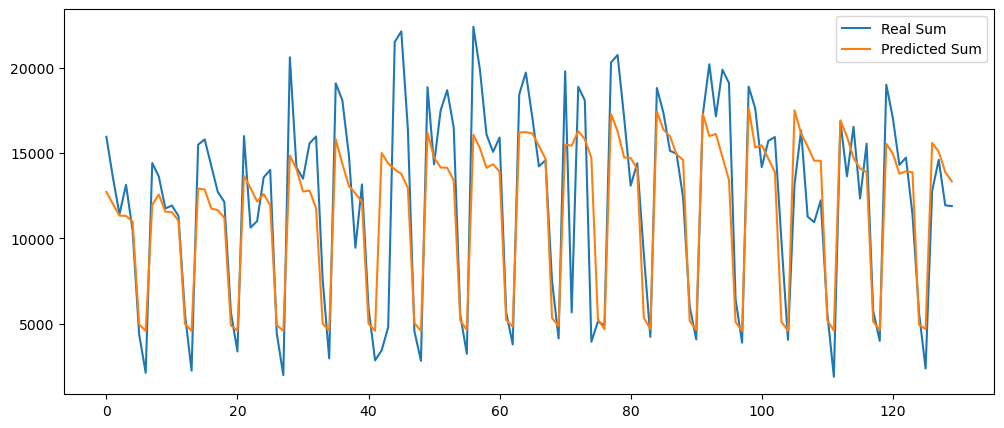

In [27]:
y_pred = model.predict(X_val)
y_pred = target_scaler.inverse_transform(y_pred)
y_val_real = target_scaler.inverse_transform(y_val)

real_sum = y_val_real.sum(axis=1)
pred_sum = y_pred.sum(axis=1)

rmse = np.sqrt(mean_squared_error(real_sum, pred_sum))
print("최종 RMSE (지역 합계 기준):", rmse)
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(real_sum, label='Real Sum')
plt.plot(pred_sum, label='Predicted Sum')
plt.legend()
plt.show()

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


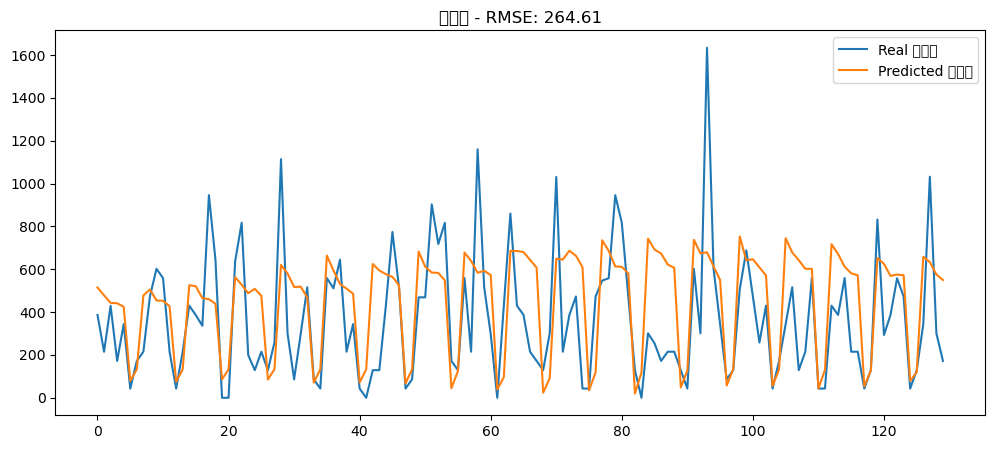

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

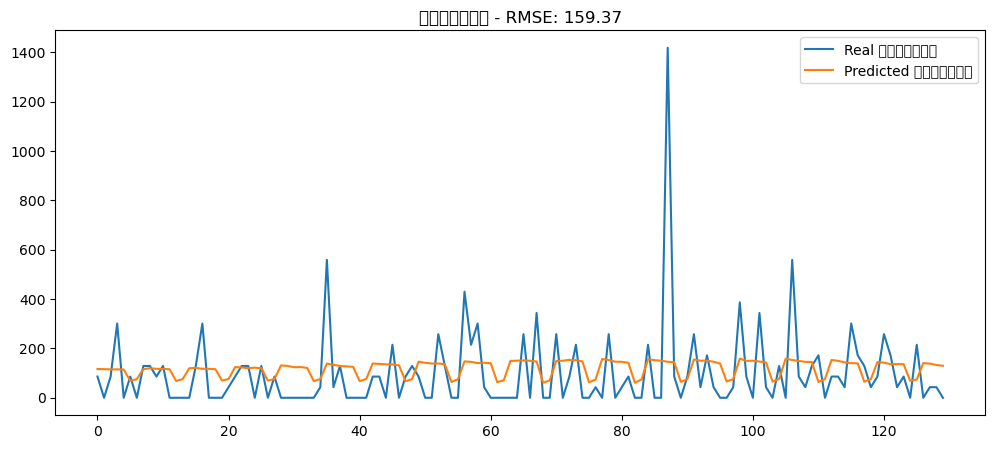

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


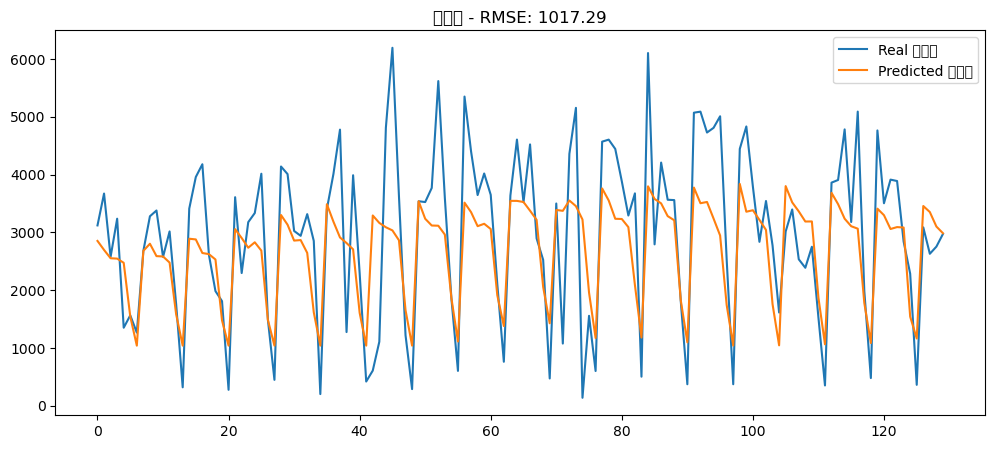

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


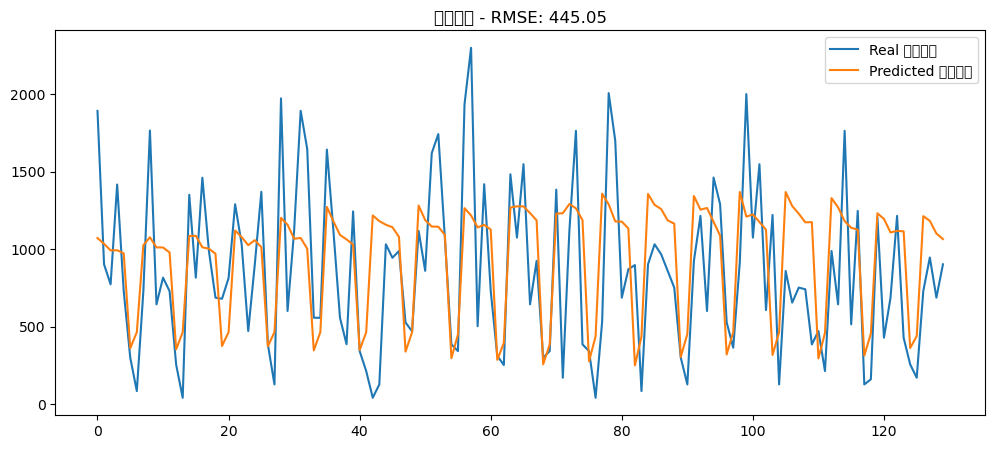

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


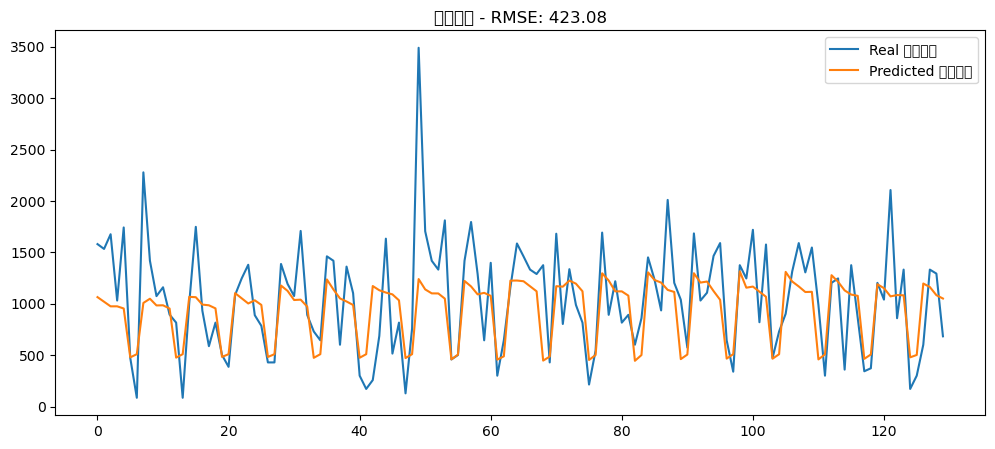

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


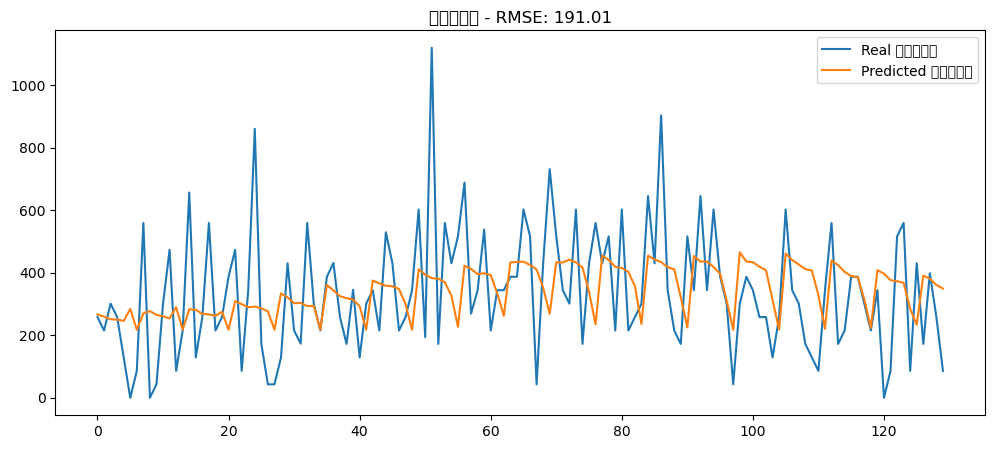

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

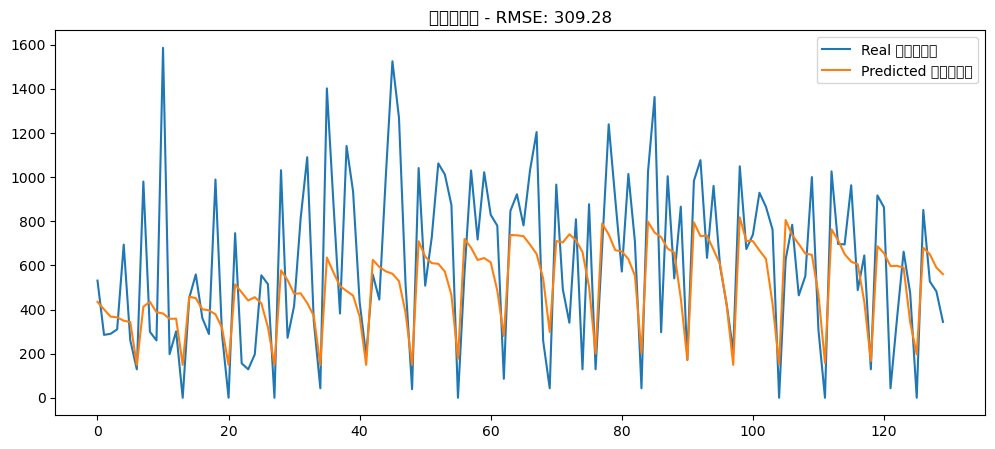

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

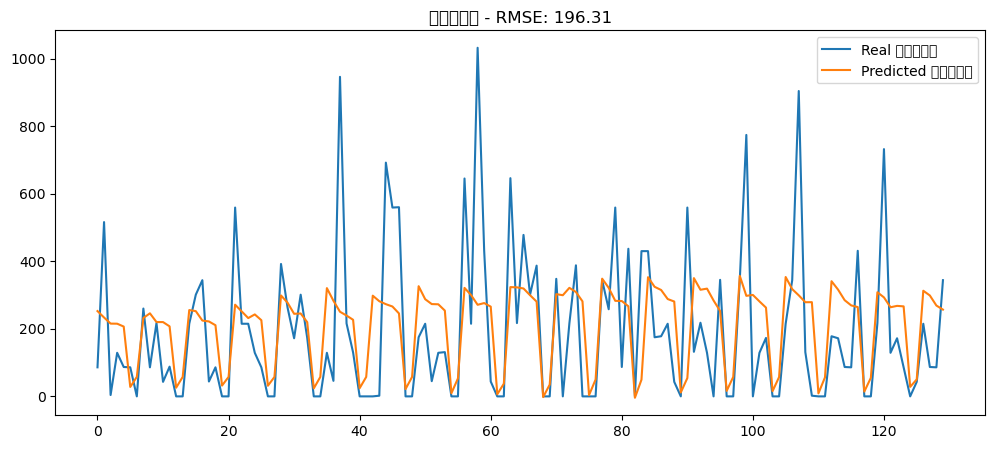

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

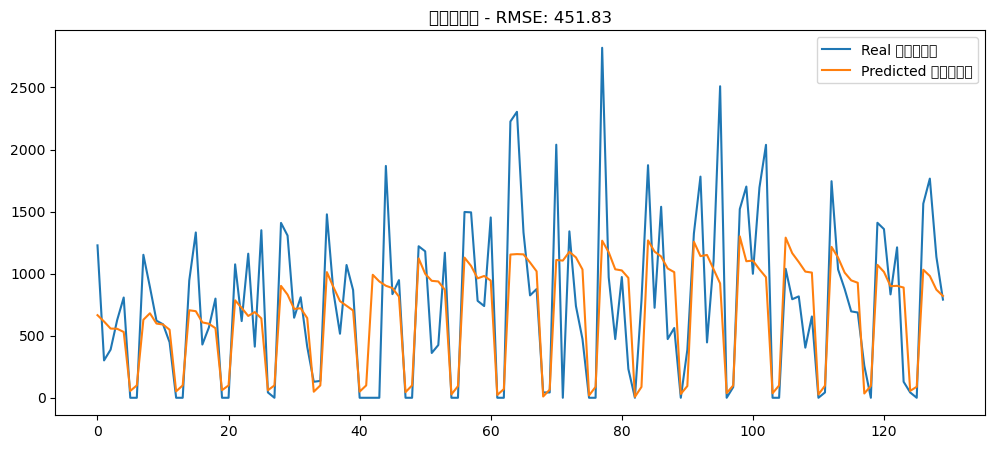

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

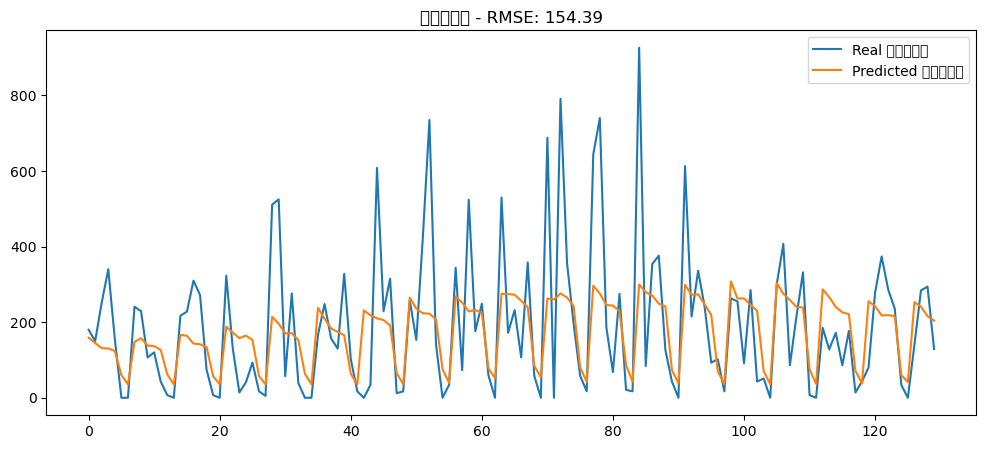

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

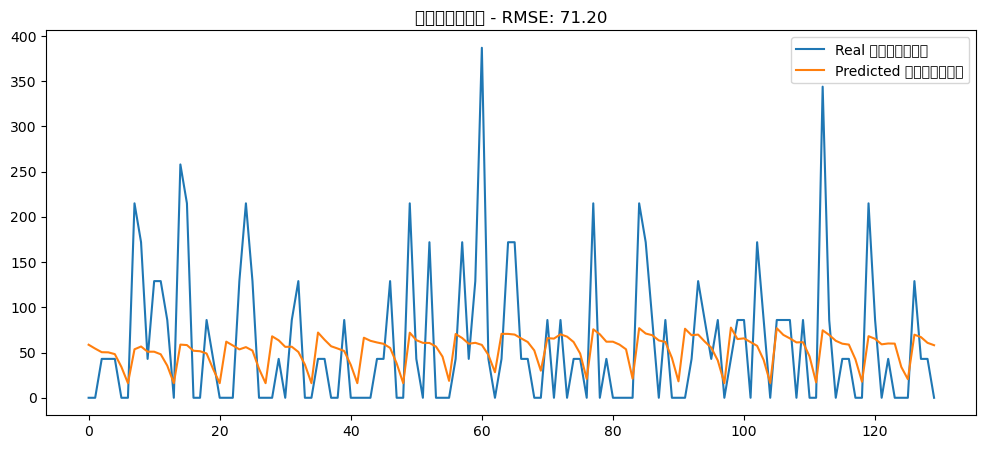

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

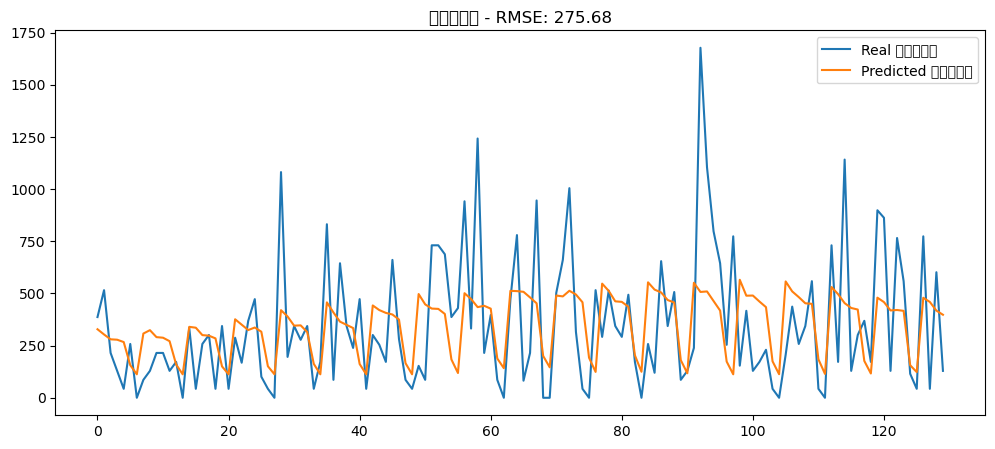

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

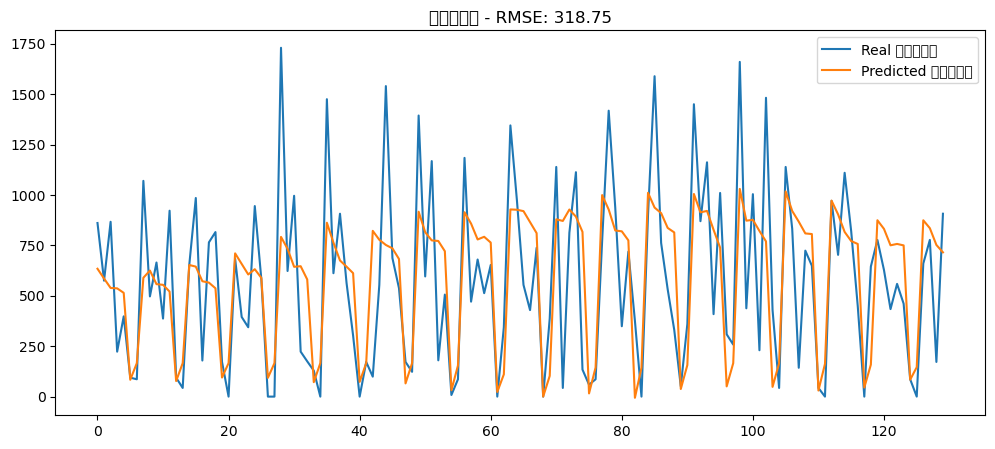

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


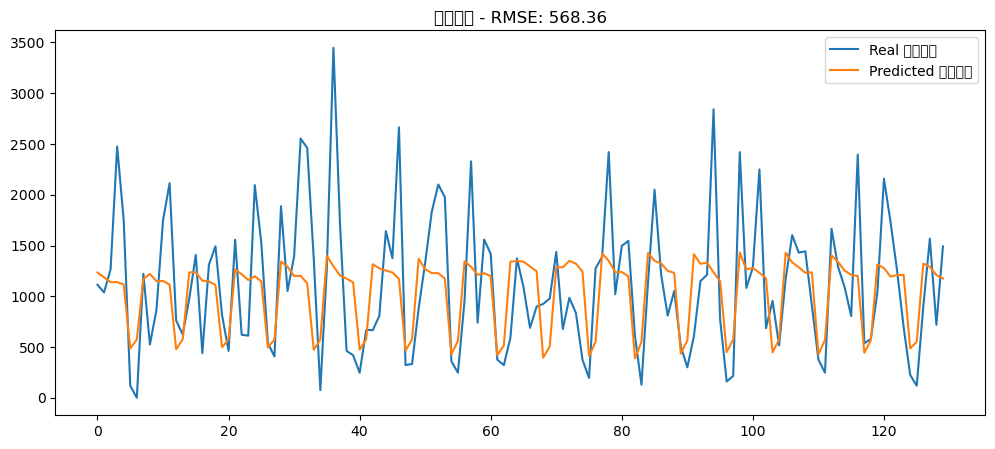

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


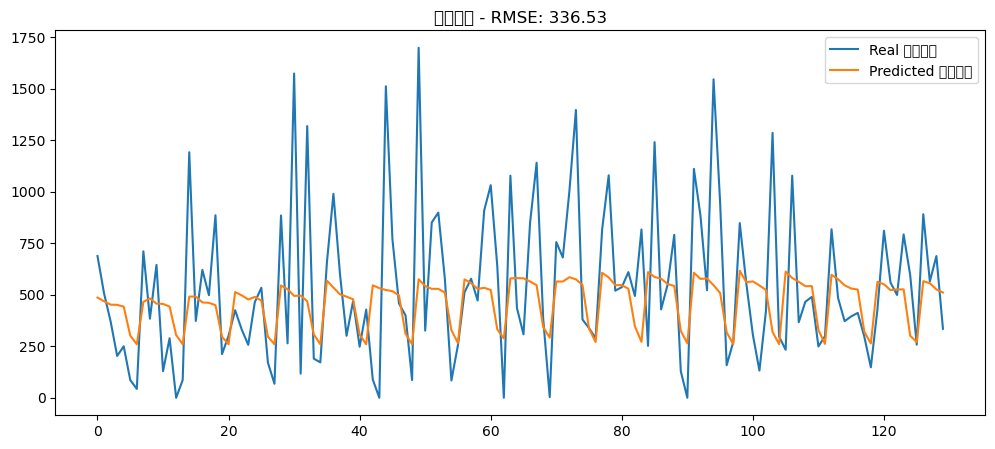

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

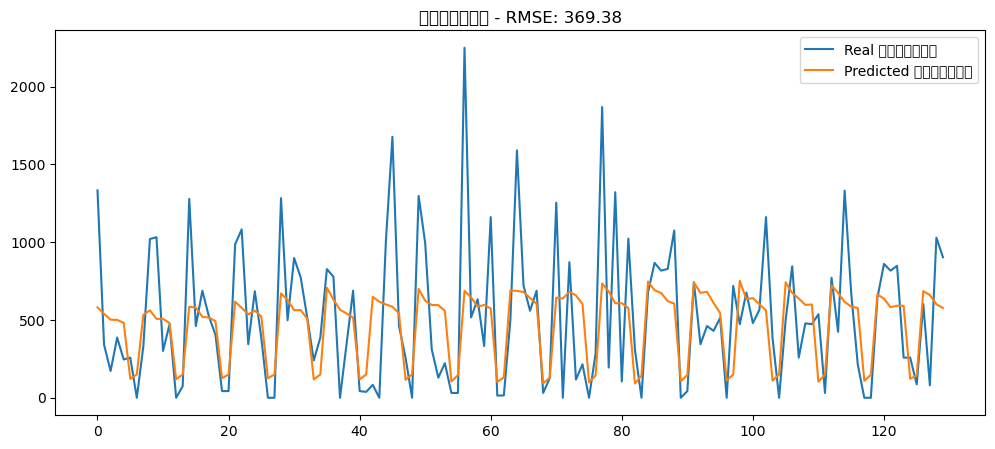

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

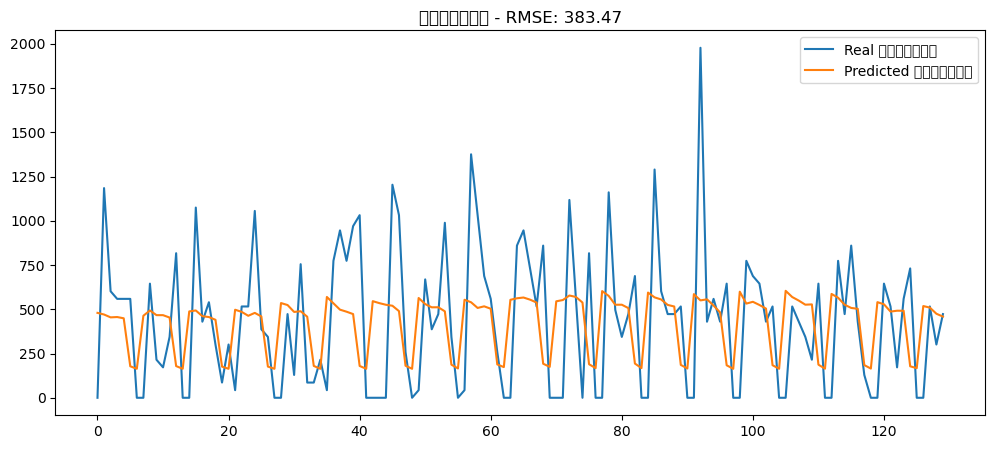

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


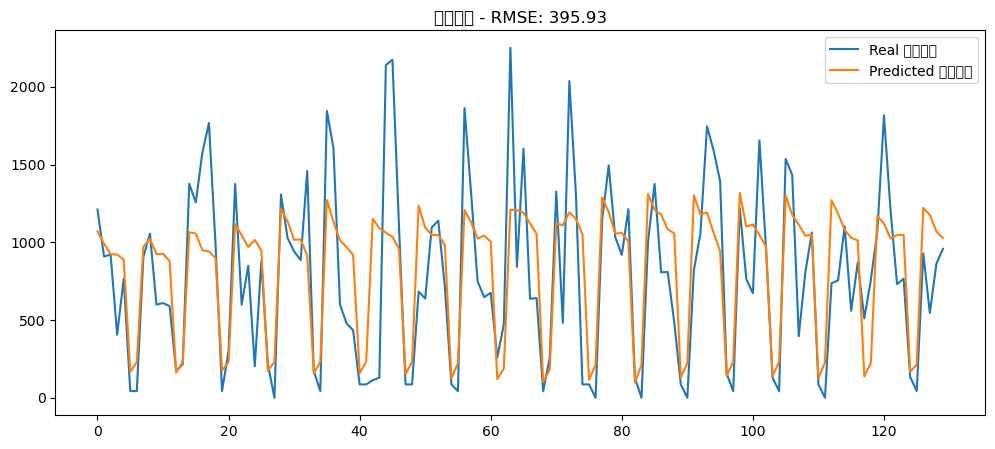

c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82103\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


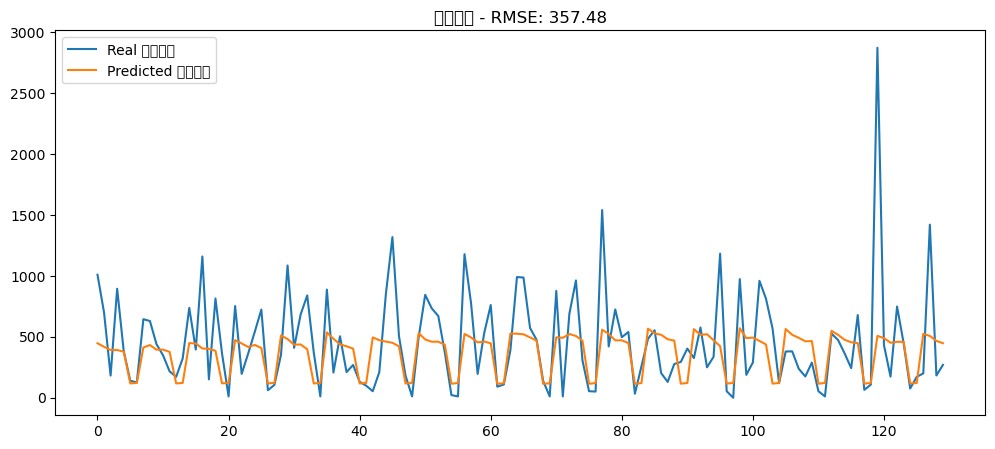

===== 지역별 RMSE =====
강원도: 264.61
강원특별자치도: 159.37
경기도: 1017.29
경상남도: 445.05
경상북도: 423.08
광주광역시: 191.01
대구광역시: 309.28
대전광역시: 196.31
부산광역시: 451.83
서울특별시: 154.39
세종특별자치시: 71.20
울산광역시: 275.68
인천광역시: 318.75
전라남도: 568.36
전라북도: 336.53
전북특별자치도: 369.38
제주특별자치도: 383.47
충청남도: 395.93
충청북도: 357.48


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# y_val_real, y_pred는 모델 평가 단계에서 만든 값 그대로 사용합니다.
# pivot_df.columns (지역 이름 리스트) 사용

regions = list(pivot_df.columns)  # 지역 이름 리스트
rmse_dict = {}  # 지역별 RMSE 저장

for i, region_name in enumerate(regions):
    real_values = y_val_real[:, i]
    pred_values = y_pred[:, i]

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(real_values, pred_values))
    rmse_dict[region_name] = rmse

    # 그래프 그리기
    plt.figure(figsize=(12, 5))
    plt.plot(real_values, label=f"Real {region_name}")
    plt.plot(pred_values, label=f"Predicted {region_name}")
    plt.title(f"{region_name} - RMSE: {rmse:.2f}")
    plt.legend()
    plt.show()

# 지역별 RMSE 출력
print("===== 지역별 RMSE =====")
for region_name, rmse in rmse_dict.items():
    print(f"{region_name}: {rmse:.2f}")